# 16/11/23 - Handling Imbalance Data
- Under Sampling : Process of removing records from the majority class is under sampling.
There are 2 techniques for under sampling :
    - Random Under Sampling
    - Near Miss Under Sampling

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,precision_score,f1_score
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("../dataset/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.0,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['Amount'] = ss.fit_transform(df[['Amount']])
df['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [15]:
df.drop(columns=['Time'],inplace=True)

In [17]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [18]:
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [20]:
X = df.drop(columns='Class')
y = df['Class']

## Without balancing

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=23)

In [24]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.83      0.74      0.78       117

    accuracy                           1.00     71202
   macro avg       0.92      0.87      0.89     71202
weighted avg       1.00      1.00      1.00     71202



In [36]:
print("Accuracy Score",accuracy_score(y_test,y_pred)*100,"%")
print("precision Score",precision_score(y_test,y_pred)*100,"%")
print("f1 Score",f1_score(y_test,y_pred)*100,"%")

Accuracy Score 99.93258616331002 %
precision Score 83.49514563106796 %
f1 Score 78.18181818181817 %


## With Near Miss Under Sampling

<Axes: xlabel='Class'>

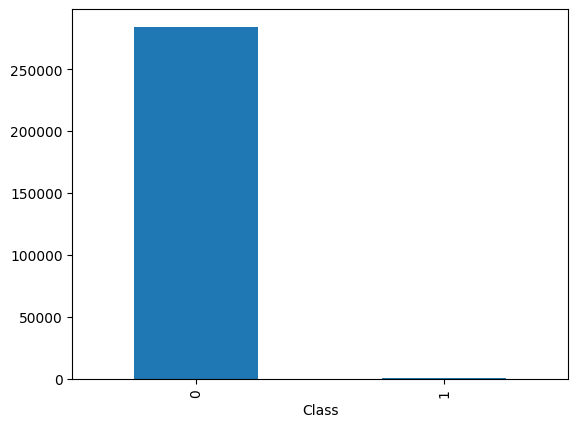

In [38]:
df['Class'].value_counts().plot(kind="bar")

In [47]:
nr = NearMiss()
X_train_miss,y_train_miss = nr.fit_resample(X_train,y_train)
print("After resampling  X: ",X_train_miss.shape)
print("After resampling  Y: ",y_train_miss.shape)

After resampling  X:  (750, 29)
After resampling  Y:  (750,)


<Axes: xlabel='Class'>

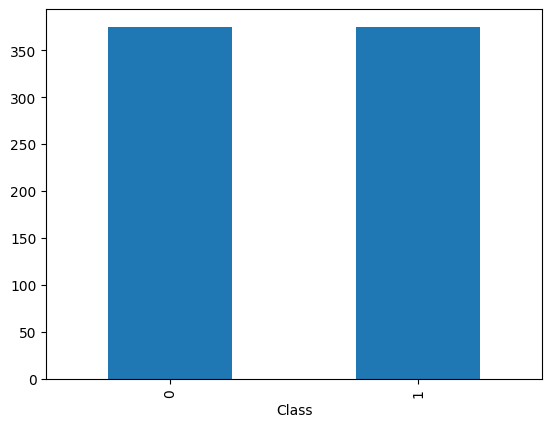

In [51]:
y_train_miss.value_counts().plot(kind="bar")

In [52]:
model = LogisticRegression()
model.fit(X_train_miss,y_train_miss)

LogisticRegression()

In [53]:
y_pred = model.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     71085
           1       0.00      0.96      0.01       117

    accuracy                           0.62     71202
   macro avg       0.50      0.79      0.38     71202
weighted avg       1.00      0.62      0.76     71202



In [55]:
print("Accuracy Score",accuracy_score(y_test,y_pred)*100,"%")
print("precision Score",precision_score(y_test,y_pred)*100,"%")
print("f1 Score",f1_score(y_test,y_pred)*100,"%")

Accuracy Score 61.55725962753855 %
precision Score 0.4075839732159104 %
f1 Score 0.811711842295985 %


## Handling Imbalanced Data Using Over Sampling
### SMOTE - Synthetic Minority Oversampling TEchnique
  - Underhood it uses KNN Algorithm

In [57]:
sm = SMOTE(random_state=2)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)
print("After resampling  X: ",X_train_miss.shape)
print("After resampling  Y: ",y_train_miss.shape)

After resampling  X:  (750, 29)
After resampling  Y:  (750,)


<Axes: xlabel='Class'>

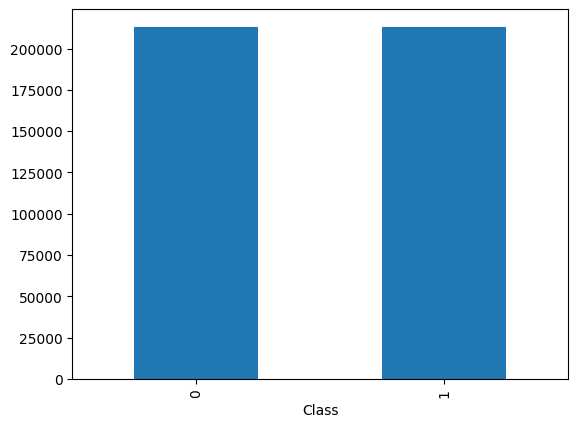

In [58]:
y_train_res.value_counts().plot(kind="bar")

In [59]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)

LogisticRegression()

In [60]:
y_pred = model.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71085
           1       0.05      0.96      0.10       117

    accuracy                           0.97     71202
   macro avg       0.53      0.96      0.54     71202
weighted avg       1.00      0.97      0.98     71202



In [62]:
print("Accuracy Score",accuracy_score(y_test,y_pred)*100,"%")
print("precision Score",precision_score(y_test,y_pred)*100,"%")
print("f1 Score",f1_score(y_test,y_pred)*100,"%")

Accuracy Score 97.09839611246875 %
precision Score 5.154164749194662 %
f1 Score 9.781659388646288 %
